<a href="https://colab.research.google.com/github/nvnagendra/nv/blob/master/O'Reilly_Class_Principal_Components_As_Factor_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
#Import ML Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Import Python libraries
import scipy.stats as scs
import numpy as np
import numpy.random as npr
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from datetime import datetime

#Import and Analyze Data

In [ ]:
#Download data from Yahoo Finance
start = datetime(2017, 7, 16)
end = datetime(2020, 12, 3)
symbols = ['IWM', 'JNK', 'QQQ', 'MGK','EEM','USO','TLT', 'VEU', 'SPY', 'GLD'] #TLT bond index; VEU is all world index ex US; GLD - gold index;
data = pdr.get_data_yahoo(symbols, start, end)

In [ ]:
#Need to check for null values to avoid processing issues
data.isnull().values.any()

False

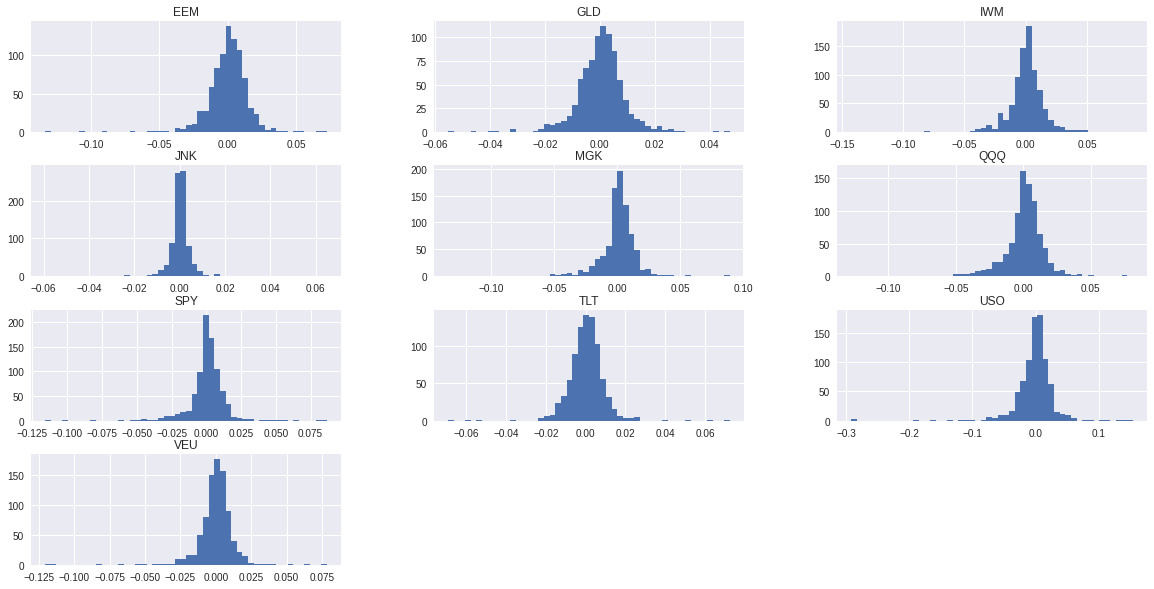

In [ ]:
#Calculate daily log returns and plot the histogram
rets = np.log(data['Adj Close']/data['Adj Close'].shift(1)) #Log returns make continuously compounded returns easy to manipulate
rets = rets.dropna()
rets.hist(bins=50, figsize = (20, 10));

In [ ]:
#Annualize mean returns
rets.mean()* 252 * 100

EEM     6.267107
GLD    11.230579
IWM     8.729466
JNK     4.496007
MGK    20.548711
QQQ    23.192659
SPY    13.701576
TLT     9.173029
USO   -26.396033
VEU     5.885976
dtype: float64

In [ ]:
#Compute the annualized covariance matrix 
covmatrix = rets.cov() * 252 #Covariance of an asset with itself is its variance (i.e. the square of its standard deviation or volatility)
covmatrix

,EEM,GLD,IWM,JNK,MGK,QQQ,SPY,TLT,USO,VEU
EEM,0.056832,0.004217,0.047948,0.016924,0.046801,0.047741,0.043069,-0.011855,0.042806,0.045180
GLD,0.004217,0.019015,0.001383,0.001627,0.002715,0.002810,0.001490,0.005788,-0.000717,0.003528
IWM,0.047948,0.001383,0.067772,0.020703,0.052048,0.051561,0.051223,-0.015326,0.047650,0.045918
JNK,0.016924,0.001627,0.020703,0.010394,0.018382,0.017669,0.017884,-0.004635,0.017966,0.016341
MGK,0.046801,0.002715,0.052048,0.018382,0.058186,0.059447,0.050482,-0.013304,0.042813,0.042122
QQQ,0.047741,0.002810,0.051561,0.017669,0.059447,0.062638,0.050625,-0.013581,0.040964,0.041877
SPY,0.043069,0.001490,0.051223,0.017884,0.050482,0.050625,0.047170,-0.013679,0.041608,0.040148
TLT,-0.011855,0.005788,-0.015326,-0.004635,-0.013304,-0.013581,-0.013679,0.021484,-0.012716,-0.011393
USO,0.042806,-0.000717,0.047650,0.017966,0.042813,0.040964,0.041608,-0.012716,0.222293,0.039263
VEU,0.045180,0.003528,0.045918,0.016341,0.042122,0.041877,0.040148,-0.011393,0.039263,0.041055


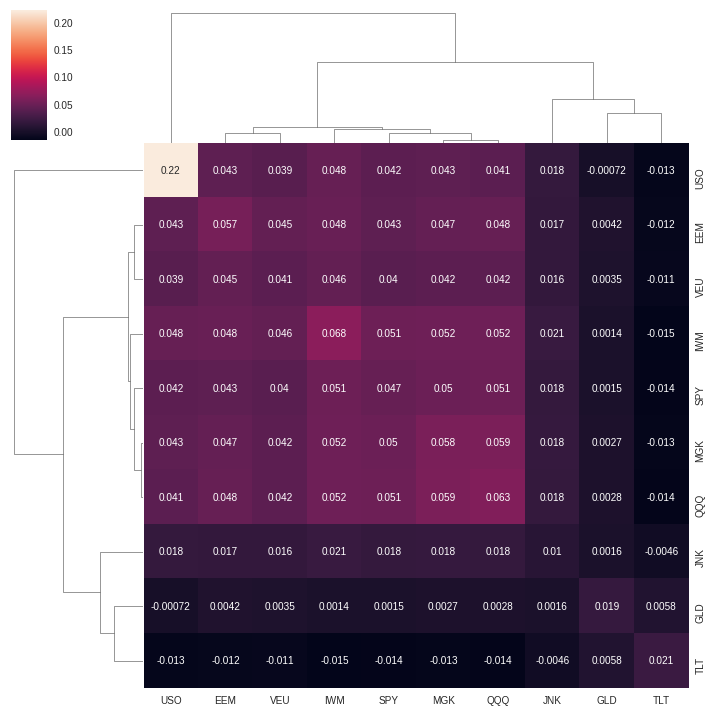

In [ ]:
#Visualize the covariance matrix
sns.clustermap(covmatrix, annot=True);

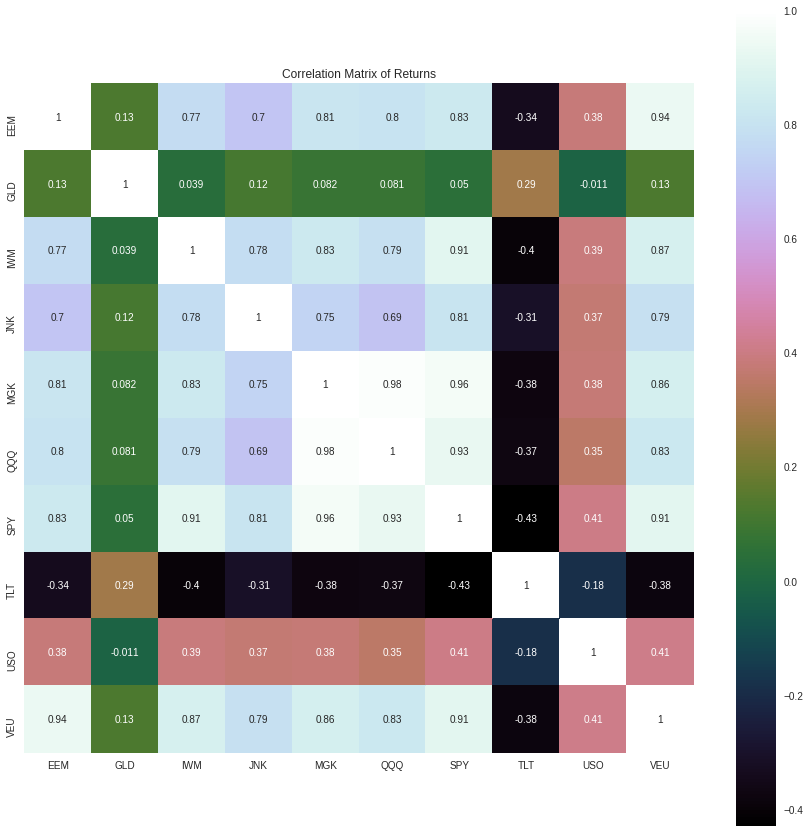

In [ ]:
#Compute and use a heatmap visualize the correlation matrix
corrmatrix = rets.corr()
plt.figure(figsize=(15, 15))
plt.title ('Correlation Matrix of Returns')
sns.heatmap(corrmatrix, vmax=1, square=True, annot=True, cmap='cubehelix');

#Engineer Features Using Principal Components

In [ ]:
standardized_rets = StandardScaler().fit_transform(rets) #Each feature/column now has a zero mean and unit variance

In [ ]:
pca = PCA().fit(standardized_rets) #Fit PCA model to the standardized returns to compute principal components
pca.components_.shape #Principal components are the rows and are linear combinations of the original 10 correlated features
#Each of the 10 principal component is uncorrelated and orthogonal to every other principal component in n-dimensional space

(10, 10)

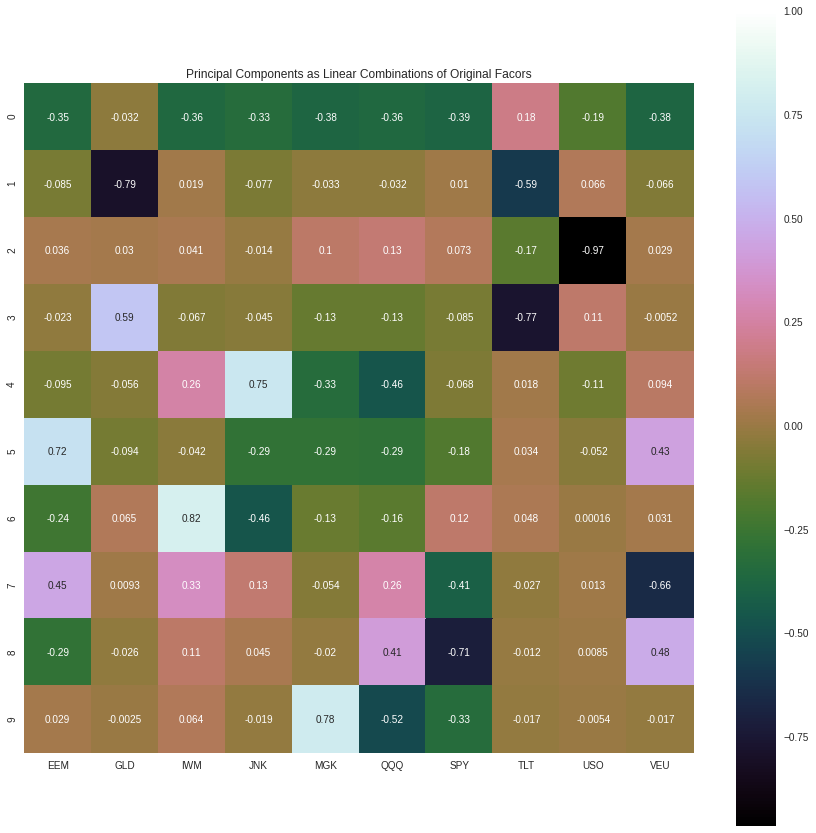

In [ ]:
#Create a data frame with all the principal components/Eigen Portfolios and visualize it with a heatmap
pca_array = pd.DataFrame(pca.components_, columns=rets.columns)
plt.figure(figsize=(15, 15))
plt.title ('Principal Components as Linear Combinations of Original Facors')
sns.heatmap(pca_array, vmax=1, square=True, annot=True, cmap='cubehelix');

In [ ]:
pca_array.head(3) #The first three principal components/Eigenvectors

,EEM,GLD,IWM,JNK,MGK,QQQ,SPY,TLT,USO,VEU
0,-0.354242,-0.031583,-0.361410,-0.332626,-0.375476,-0.364654,-0.386149,0.181076,-0.186908,-0.376123
1,-0.085122,-0.793581,0.018895,-0.077413,-0.032674,-0.031512,0.010275,-0.588012,0.065881,-0.066092
2,0.035823,0.030236,0.041464,-0.013698,0.103717,0.132057,0.073390,-0.165991,-0.966383,0.029396


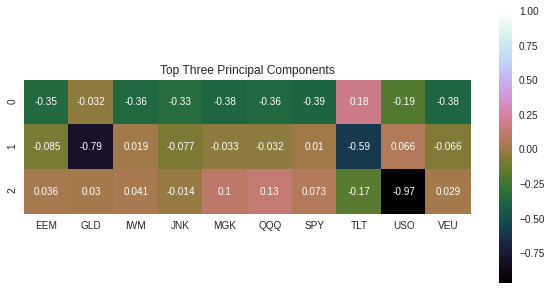

In [ ]:
plt.figure(figsize=(10, 5))
plt.title ('Top Three Principal Components')
sns.heatmap(pca_array.head(3), vmax=1, square=True, annot=True, cmap='cubehelix');

In [ ]:
print(pca.explained_variance_) #Variance/Eigenvalues of each principal component

[6.42162404 1.25517777 0.81301552 0.5658782  0.37978835 0.30857986
 0.18857603 0.04888216 0.02232576 0.00790319]


In [ ]:
print(pca.explained_variance_ratio_) #Explained variance per PCA component/percentage of total

[0.64140869 0.12537046 0.08120613 0.0565214  0.03793426 0.03082177
 0.01883547 0.00488248 0.00222996 0.00078939]


In [ ]:
pca = PCA(n_components=0.80) #Select the principal components that explain 80% of the variance in the returns
pca_rets = pca.fit_transform(standardized_rets) #Projects the standardized returns onto the top 3 principal components
pca_rets.shape

(852, 3)

In [ ]:
factors = pd.DataFrame(pca_rets, index=rets.index)
factors.head()

,0,1,2
Date,,,
2017-07-18,-0.248686,-1.163953,-0.399471
2017-07-19,-1.085245,0.006047,-0.393183
2017-07-20,-0.005185,-0.276356,0.194529
2017-07-21,0.602377,-1.015687,0.810025
2017-07-24,-0.381720,0.285305,-0.474066


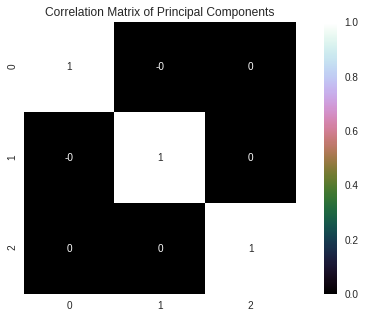

In [ ]:
#All risk factors/features are uncorrelated to one another
plt.figure(figsize=(10, 5))
plt.title ('Correlation Matrix of Principal Components')
sns.heatmap(factors.corr().round(1), vmax=1, square=True, annot=True, cmap='cubehelix');